# Basics before diving into Deep Learning

## Pytorch (Data Manipulation)

### 2.1.1 Getting started

In [2]:
%matplotlib inline
import numpy as np
from matplotlib_inline import backend_inline
import torch
import random
from torch.distributions.multinomial import Multinomial

In [2]:
tensor = torch.arange(12, dtype=torch.float32)
# creating a tensor starting from 0 (included) to 12 (not included), tensor is somewhat similar to an array
# when the tensor has dimensionality 1, it is also called a vector
# the step is 1 by default
# the type of the numbers are int by default, so dtype is used to specify the type of the numbers, which is float in this case

tensor

tensor([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11.])

In [3]:
tensor.numel() # number of elements in a tensor

12

In [4]:
tensor.shape

torch.Size([12])

In [5]:
tensor = tensor.reshape(3, 4)
tensor

tensor([[ 0.,  1.,  2.,  3.],
        [ 4.,  5.,  6.,  7.],
        [ 8.,  9., 10., 11.]])

In [6]:
torch.zeros(3, 5, 4)
# number of matrices, number of lines per matrix, number of columns per matrix

tensor([[[0., 0., 0., 0.],
         [0., 0., 0., 0.],
         [0., 0., 0., 0.],
         [0., 0., 0., 0.],
         [0., 0., 0., 0.]],

        [[0., 0., 0., 0.],
         [0., 0., 0., 0.],
         [0., 0., 0., 0.],
         [0., 0., 0., 0.],
         [0., 0., 0., 0.]],

        [[0., 0., 0., 0.],
         [0., 0., 0., 0.],
         [0., 0., 0., 0.],
         [0., 0., 0., 0.],
         [0., 0., 0., 0.]]])

In [7]:
torch.ones(2, 3, 5)

tensor([[[1., 1., 1., 1., 1.],
         [1., 1., 1., 1., 1.],
         [1., 1., 1., 1., 1.]],

        [[1., 1., 1., 1., 1.],
         [1., 1., 1., 1., 1.],
         [1., 1., 1., 1., 1.]]])

In [8]:
torch.randn(4, 4)

tensor([[-0.2604,  0.6360, -1.1060,  1.0686],
        [ 1.1850,  0.0485,  0.6289, -0.8937],
        [-0.2741, -0.9207, -0.2322, -2.0807],
        [-1.1771, -0.8058, -1.6128, -0.7554]])

In [9]:
torch.tensor([[2, 1, 4, 3], [1, 2, 3, 4], [4, 3, 2, 1]])

tensor([[2, 1, 4, 3],
        [1, 2, 3, 4],
        [4, 3, 2, 1]])

### 2.1.2 Indexing and Slicing

In [11]:
ex = torch.arange(15).reshape(3, 5)
ex

tensor([[ 0,  1,  2,  3,  4],
        [ 5,  6,  7,  8,  9],
        [10, 11, 12, 13, 14]])

In [12]:
ex[-1], ex[1:3]
# last row, rows between 1st and 3rd

(tensor([10, 11, 12, 13, 14]),
 tensor([[ 5,  6,  7,  8,  9],
         [10, 11, 12, 13, 14]]))

In [14]:
ex[0, 0] = 15 # it is easy to change the value at a specific index, just like python
ex

tensor([[15,  1,  2,  3,  4],
        [ 5,  6,  7,  8,  9],
        [10, 11, 12, 13, 14]])

### 2.1.3 Operations

In [15]:
torch.exp(ex) # e**x

tensor([[3.2690e+06, 2.7183e+00, 7.3891e+00, 2.0086e+01, 5.4598e+01],
        [1.4841e+02, 4.0343e+02, 1.0966e+03, 2.9810e+03, 8.1031e+03],
        [2.2026e+04, 5.9874e+04, 1.6275e+05, 4.4241e+05, 1.2026e+06]])

In [28]:
a = torch.tensor([2, 4, 6, 8])
b = torch.tensor([1, 3, 6, 9])
a + b, a - b, a * b, a / b, a ** b # simple operations

(tensor([ 3,  7, 12, 17]),
 tensor([ 1,  1,  0, -1]),
 tensor([ 2, 12, 36, 72]),
 tensor([2.0000, 1.3333, 1.0000, 0.8889]),
 tensor([        2,        64,     46656, 134217728]))

In [29]:
a == b # checks element by element if they are equal
# this should only work when the 2 compared tensors are from the same shape

tensor([False, False,  True, False])

In [30]:
a.sum() # simple sum of all elements of a tensor

tensor(20)

### 2.1.5 Saving Memory

In [31]:
before = id(a)
a = a + b # a += b would also be better for memory
id(a) == before
# here, we are allocating memory desnecessarily and in machine learning, hundreds of megabytes are taken into consideration into each parameters

False

In [32]:
c = torch.zeros_like(b)
print(f"id(c): {id(c)}")
c[:] = a + b
print(f"id(c): {id(c)}")
# here, we use the same memory to store c even though we are changing its value

id(c): 2567957477616
id(c): 2567957477616


### 2.1.6 Conversion to Other Python Objects

In [33]:
A = a.numpy() # from tensor to ndarray (numpy)
B = torch.from_numpy(A) # from ndarray to tensor
type(A), type(B)

(numpy.ndarray, torch.Tensor)

In [34]:
a = torch.tensor([8.7]) 
a, a.item(), float(a), int(a) # ways to convert a size-1 tensor to a number

(tensor([8.7000]), 8.699999809265137, 8.699999809265137, 8)

## Linear Algebra

### 2.3.1 Scalars

In [24]:
# scalars are just simple numbers
x = torch.tensor(3)
y = torch.tensor(2)

x + y, x * y, x / y, x**y

(tensor(5), tensor(6), tensor(1.5000), tensor(9))

### 2.3.2 Vectors

In [16]:
x = torch.arange(5)
x # a simple tensor

tensor([0, 1, 2, 3, 4])

### 2.3.3 Matrices

In [17]:
matrix = torch.arange(9).reshape(3, 3) # matrix m x n (3x3 in this case)
matrix

tensor([[0, 1, 2],
        [3, 4, 5],
        [6, 7, 8]])

In [18]:
matrix.T # transposing the matrix

tensor([[0, 3, 6],
        [1, 4, 7],
        [2, 5, 8]])

### 2.3.4 Tensors

In [19]:
torch.arange(24).reshape(2, 3, 4) # "depth" = 2, that is, 2 matrices there
# they are structures more complex than matrices
# they'll be used for representing images and collection of images in code

tensor([[[ 0,  1,  2,  3],
         [ 4,  5,  6,  7],
         [ 8,  9, 10, 11]],

        [[12, 13, 14, 15],
         [16, 17, 18, 19],
         [20, 21, 22, 23]]])

### 2.3.5. Basic Properties of Tensor Arithmetic

In [2]:
A = torch.arange(12).reshape(3, 4)
B = A.clone() # allocating new memory to a copy of A
A, A + B

(tensor([[ 0,  1,  2,  3],
         [ 4,  5,  6,  7],
         [ 8,  9, 10, 11]]),
 tensor([[ 0,  2,  4,  6],
         [ 8, 10, 12, 14],
         [16, 18, 20, 22]]))

In [3]:
A * B # normal matrices operations

tensor([[  0,   1,   4,   9],
        [ 16,  25,  36,  49],
        [ 64,  81, 100, 121]])

### 2.3.8. Dot Product

In [8]:
x = torch.arange(3, dtype=torch.float32)
y = torch.ones(3)
x, y, torch.dot(x, y) # simple dot product

(tensor([0., 1., 2.]), tensor([1., 1., 1.]), tensor(3.))

In [9]:
torch.sum(x * y) # this is another way to calculate the dot product between 2 tensors

tensor(3.)

### 2.3.9 Matrix-Vector Products

In [13]:
A = torch.arange(6, dtype=torch.float32).reshape(2, 3)
x = torch.arange(3, dtype=torch.float32)
A, x, torch.mv(A, x), A@x
# torch.mv (matrix-vector) is used for matrix-vector products
# the operator @ in python is used for both matrix-vector and matrix-matrix products

(tensor([[0., 1., 2.],
         [3., 4., 5.]]),
 tensor([0., 1., 2.]),
 tensor([ 5., 14.]),
 tensor([ 5., 14.]))

### 2.3.10 Matrix-Matrix Multiplication

In [14]:
B = torch.ones(3, 4)
torch.mm(A, B), A@B
# torch.mm (matrix-matrix) is used for matrix-matrix multiplication
# @ has similar use to the section's 2.3.9

(tensor([[ 3.,  3.,  3.,  3.],
         [12., 12., 12., 12.]]),
 tensor([[ 3.,  3.,  3.,  3.],
         [12., 12., 12., 12.]]))

### 2.3.11 Norms

In [16]:
C = torch.ones((4, 9))
C, torch.norm(C)

(tensor([[1., 1., 1., 1., 1., 1., 1., 1., 1.],
         [1., 1., 1., 1., 1., 1., 1., 1., 1.],
         [1., 1., 1., 1., 1., 1., 1., 1., 1.],
         [1., 1., 1., 1., 1., 1., 1., 1., 1.]]),
 tensor(6.))

## Calculus

In [5]:
from d2l import torch as d2l

### 2.4.1 Derivatives and Differentiation

In [8]:
def f(x):
    return 3 * (x ** 2) - 4 * x

def diff(x, h):
    return (f(x + h) - f(x)) / h

In [34]:
x = 1 # prooving that f'(1) = 2

for h in [10**(-3), 10**(-4), 10**(-5)]:
    print(f"h = {h:.5f}, limit = {diff(x, h):.5f}")

for h in [-10**(-3), -10**(-4), -10**(-5)]:
    print(f"h = {h:.5f}, limit = {diff(x, h):.5f}")

h = 0.00100, limit = 2.00300
h = 0.00010, limit = 2.00030
h = 0.00001, limit = 2.00003
h = -0.00100, limit = 1.99700
h = -0.00010, limit = 1.99970
h = -0.00001, limit = 1.99997


### 2.4.2 Visualization Utilities

In [10]:
def use_svg_display():  #@save
    # the above comment tells the system to save the function in the d2l library so we can use it later without repeting the code
    backend_inline.set_matplotlib_formats('svg')

In [15]:
# setting the figure size of any figures that will be ploted by matplotlib
def set_figsize(figsize=(12, 8)):  #@save
    use_svg_display()
    d2l.plt.rcParams['figure.figsize'] = figsize

In [12]:
# setting the axes for any figure ploted
#@save
def set_axes(axes, xlabel, ylabel, xlim, ylim, xscale, yscale, legend):
    """Set the axes for matplotlib."""
    axes.set_xlabel(xlabel), axes.set_ylabel(ylabel)
    axes.set_xscale(xscale), axes.set_yscale(yscale)
    axes.set_xlim(xlim),     axes.set_ylim(ylim)
    if legend:
        axes.legend(legend)
    axes.grid()

In [17]:
# code for the plot function
#@save
def plot(X, Y=None, xlabel=None, ylabel=None, legend=[], xlim=None,
         ylim=None, xscale='linear', yscale='linear',
         fmts=('-', 'm--', 'g-.', 'r:'), figsize=(12, 8), axes=None):
    """Plot data points."""

    def has_one_axis(X):  # True if X (tensor or list) has 1 axis
        return (hasattr(X, "ndim") and X.ndim == 1 or isinstance(X, list)
                and not hasattr(X[0], "__len__"))

    if has_one_axis(X): X = [X]
    if Y is None:
        X, Y = [[]] * len(X), X
    elif has_one_axis(Y):
        Y = [Y]
    if len(X) != len(Y):
        X = X * len(Y)

    set_figsize(figsize)
    if axes is None:
        axes = d2l.plt.gca()
    axes.cla()
    for x, y, fmt in zip(X, Y, fmts):
        axes.plot(x,y,fmt) if len(x) else axes.plot(y,fmt)
    set_axes(axes, xlabel, ylabel, xlim, ylim, xscale, yscale, legend)

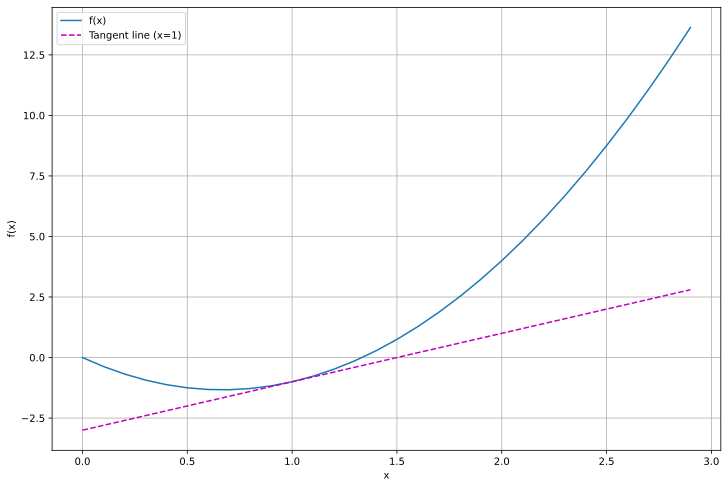

In [21]:
x = np.arange(0, 3, 0.1)
plot(x, [f(x), 2 * x - 3], 'x', 'f(x)', legend=['f(x)', 'Tangent line (x=1)'])

## Automatic Differentiation

### 2.5.1. A Simple Function

In [62]:
# we'll try to differentiate the function y = 2x**T * x

x = torch.arange(4.0)
x # in the function it is the x

tensor([0., 1., 2., 3.])

In [63]:
x.requires_grad_(True) # we could also have created vector as torch.arange(4.0, requires_grad=True)
x.grad # setting the gradient of the vector to None by default

In [64]:
y = 2 * torch.dot(x, x) # computing the value of the function
y

tensor(28., grad_fn=<MulBackward0>)

In [65]:
y.backward() # calculates the gradients of y with respect to all tensors that have "requires_grad=True"
x.grad # the gradient of y with respect to the x value

tensor([ 0.,  4.,  8., 12.])

In [66]:
# since vector == tensor([ 0.,  1.,  2., 3.]) and vector.grad == tensor([ 0.,  4.,  8., 12.])
# then the gradient of the function with respect to x should be 4 * x, so we'll check this

x.grad == 4 * x

tensor([True, True, True, True])

In [67]:
x.grad.zero_() # the gradient of a vector is not automatically reseted
y = x.sum() # creating a new function y
y.backward()
x.grad # the gradient of y with respect to vector

tensor([1., 1., 1., 1.])

### 2.5.2. Backward for Non-Scalar Variables

In [68]:
x.grad.zero_()
y = x ** 2
y.backward()
# in pytorch the backward function can only be called if y, in this case, is a scalar, if not, we have to tell it how to transform y into a scalar value
x.grad()

RuntimeError: grad can be implicitly created only for scalar outputs

In [70]:
x.grad.zero_()
y = x ** 2
y.backward(gradient=torch.ones(len(y))) # this is a correct way to transform it into a scalar value
# y.sum().backward() could also be used
x.grad

tensor([0., 2., 4., 6.])

### 2.5.3 Detaching Computation

In [72]:
x.grad.zero_()
y = x * x
u = y.detach() # this creates a varible u equals to y, but u has no descedents, so z' = u (z = u * x) instead of z' = 3 * x**2 (z = x**3)
z = u * x # now, z is not acessible via y

z.sum().backward() # transforming in a scalar value and calling backward
x.grad == u

tensor([True, True, True, True])

### 2.5.4 Gradients and Python Control Flow

In [73]:
# pytorch can still calculate gradient values even when the function passes through a lot of python mazes

def f(a):
    b = a * 2
    while b.norm() < 1000:
        b = b * 2
    if b.sum() > 0:
        c = b
    else:
        c = 100 * b
    return c

In [89]:
a = torch.randn(size=(), requires_grad=True)
b = f(a)
b.backward()
a.grad

tensor(204800.)

## Probability and Statistics

### 2.6.1 A Simple Example: Tossing Coins

In [12]:
tosses = 100
heads = sum([random.random() > 0.5 for _ in range(tosses)])
tails = tosses - heads
print(f"Heads: {heads}\nTails: {tails}")

Heads: 56
Tails: 44


In [18]:
fair_prob = torch.tensor([0.5, 0.5]) # chance of heads, chance of tails
Multinomial(100, fair_prob).sample() # 100 here is the number of tosses

tensor([48., 52.])

In [19]:
Multinomial(100, fair_prob).sample() / 100 # here we calculate the frequency

tensor([0.5000, 0.5000])

In [21]:
Multinomial(1000000, fair_prob).sample() / 1000000 # here we can visualize and conclude better if the coin is fair or not

tensor([0.5003, 0.4997])

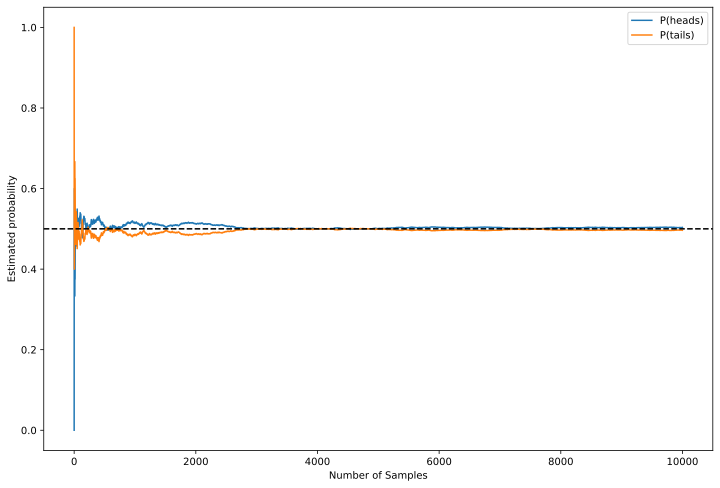

In [29]:
counts = Multinomial(1, fair_prob).sample((10000,)) # now doing that with 10000 tosses
cum_counts = counts.cumsum(dim=0) 
estimates = cum_counts / cum_counts.sum(dim=1, keepdims=True) # creating the estimates
estimates = estimates.numpy()

d2l.set_figsize((12, 8)) # I like 12x8 figures
d2l.plt.plot(estimates[:, 0], label=("P(heads)"))
d2l.plt.plot(estimates[:, 1], label=("P(tails)"))
d2l.plt.axhline(y=0.5, color="black", linestyle="dashed") # creating a dashed line in y=0.5 (expected values) for better visualization
d2l.plt.gca().set_xlabel("Number of Samples")
d2l.plt.gca().set_ylabel("Estimated probability")
d2l.plt.legend();